In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import scipy.stats as stats
import pymc as pm
import arviz as az

sns.set_style("whitegrid")

print("Running on PyMC3 v{}".format(pm.__version__))
print("Running on arviz v{}".format(az.__version__))

Running on PyMC3 v5.7.2
Running on arviz v0.16.0


In [2]:
path_train = "train_reg.csv"
path_test = "test_reg.csv"

In [3]:
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [4]:
df_train.describe()

,x,y
count,100.000000,100.000000
mean,5.481055,16.200259
std,3.532878,11.034661
min,-1.029314,-1.304344
25%,2.940914,7.641243
50%,5.465777,14.239823
75%,8.179536,23.777335
max,11.805770,40.500564


In [5]:
x = df_train['x']
y = df_train['x']

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α, β]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 17 seconds.
/Users/imachome/anaconda3/lib/python3.11/site-packages/arviz/utils.py:185: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/Users/imachome/anaconda3/lib/python3.11/site-packages/arviz/utils.py:185: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behav

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,0.001,0.184,-0.346,0.347,0.004,0.003,2010.0,2252.0,1.0
β,1.000,0.028,0.946,1.053,0.001,0.000,2038.0,2256.0,1.0
μ[0],0.416,0.175,0.091,0.749,0.004,0.003,2035.0,2333.0,1.0


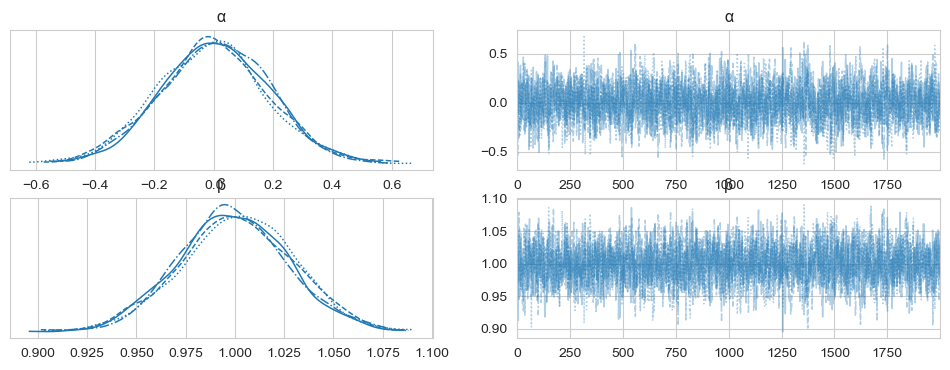

In [6]:
with pm.Model() as model_g:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=1)
    μ = pm.Deterministic('μ', α + β * x)
    y_pred = pm.Normal('y_pred', mu=μ, observed=y)
    trace_g = pm.sample(2000, tune=2000, chains=4, cores=4)

az.plot_trace(trace_g, var_names=['α', 'β']);
az.summary(trace_g).head(3)

## Задача 2

In [7]:
α = az.summary(trace_g).head(3)[:1].mean()[:1].item()
β = az.summary(trace_g).head(3)[1:2].mean()[:1].item()

In [8]:
X_test = df_test

In [9]:
y_pred_test = α + β*X_test

In [10]:
y_pred_test

,x
0,5.914738
1,2.658985
2,-0.665239
3,9.892288
4,7.225223
...,...
95,9.194599
96,10.586770
97,1.845702
98,0.538906


In [11]:
from sklearn.metrics import mean_squared_error
y_true = pd.read_csv('test_Y_true_reg.csv')
mean_squared_error(y_true, y_pred_test)

157.79130391087804